# STA160 Data Science 2021 Spring

# Part5- Decision Tree and Ensemble Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
# keep data in Numpy Arrays
X=iris.data
Y=iris.target

## Decision Tree

CART (Classification And Regression Tree):

* Spliting the data into two subsets using a single feature t and a threshold value v. 

* Searching for the pair (t,v) such that the lost function can decrease the most. 

* Recursively finding the optimal split from the top level to the bottom.

* Stop recursing once it reaches the maximum depth or cannot find a split that will reduce the cost.


Lost function:

$$L(t,v)= \frac{n_{left}}{n} C_{left} + \frac{n_{right}}{n} C_{right}$$


Criteria $C$ is used to measure the quality of a split. Supported criteria are "gini" for the Gini index and "entropy" for the information gain.

Gini Index:
$$Gini= \sum_{k=1}^{K} p_k (1-p_k)$$

Entropy:
$$H= -\sum_{k=1}^{K} p_k log(p_k)$$

where $p_k$ is the ratio of class k samples among all the samples in the node,

$$\hat{p}_k=\frac{1}{|node|}\sum_{x_i \in node} I(y_i=k)$$


Gini index and entropy work pretty simialr. Howeber, gini is slightly faster and entropy tends to produce slightly more balanced trees.

Decision:

Operate tree descend and end at a tree leaf. Make a decision according to the estimated probability of the tree leaf.


Stop criteria:

* max_depth: 
The maximum depth of the tree.

* min_samples_split (default=2): 
The minimum number of samples required to split an internal node

* min_samples_leaf (default=1): 
The minimum number of samples required to be at a leaf node.

* min_impurity_decrease (default=0):
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    
* min_impurity_split (default=1e-7):
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

Note: CART does not require feautre scaling or centering.

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

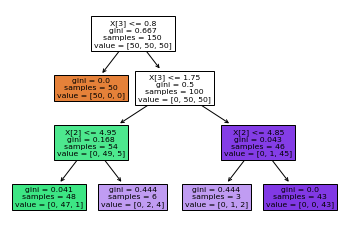

In [6]:
plot_tree(tree,filled=True);

__export_graphviz__: Export a decision tree in DOT format.

This function generates a GraphViz representation of the decision tree, which is then written into `out_file`. Once exported, graphical renderings can be generated using.

In [4]:
# install package graphviz
#conda install python-graphviz
import graphviz

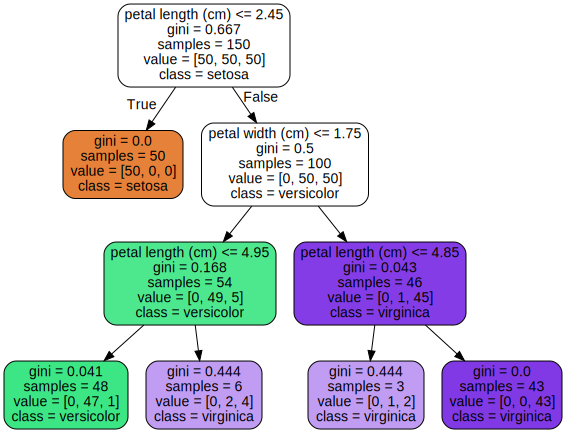

In [5]:
dot_data=export_graphviz(tree, 
                out_file=None,
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True,
                leaves_parallel=False,
                filled=True)
graph = graphviz.Source(dot_data)
graph

2-D Decision Boundary

In [7]:
# Plotting 2-D decision regions
def decision_region(X, Y, model, prob=None):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    
    if prob is not None:
        prob_max=model.predict_proba(np.c_[x1.ravel(), x2.ravel()]).max(1)
        Z[prob_max<prob]=-1
    
    Z = Z.reshape(x1.shape)

    plt.contourf(x1, x2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    plt.show()

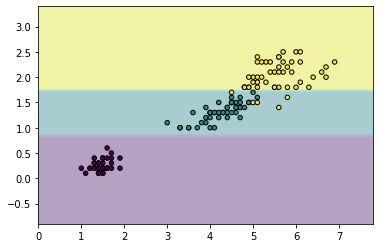

In [8]:
petal_len_wid=iris['data'][:,2:] # petal length + petal width
# max_depth is 2
tree2=DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=1)
tree2.fit(petal_len_wid,Y)
decision_region(petal_len_wid, Y, tree2)

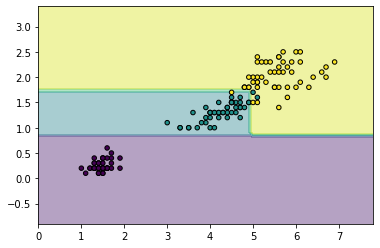

In [9]:
# max_depth is 3
tree3=DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=1)
tree3.fit(petal_len_wid,Y)
decision_region(petal_len_wid, Y, tree3)

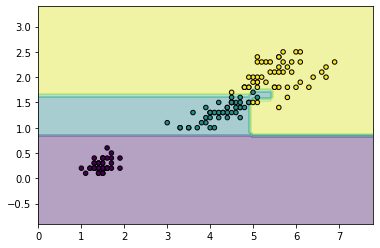

In [10]:
# max_depth is 5
tree4=DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=1)
tree4.fit(petal_len_wid,Y)
decision_region(petal_len_wid, Y, tree4)

## Decision Tree Regression
Just like classification, we can also use Decision tree for regression but with different criterion.

Lost function:
$$L(t,v)= \frac{n_{left}}{n} MSE_{left} + \frac{n_{right}}{n} MSE_{right} $$

MSE:
$$\frac{1}{|node|}\sum_{x_i \in node}(y_i-\hat{y})^2$$

Prediction:
$$\hat{y}=\frac{1}{|node|}\sum_{x_i \in node}y_i$$

the prediction is simply the average response value of the samples associated to this leaf node.


In [10]:
x=np.linspace(-1,1,100).reshape(-1,1)
y=x**2-0.3*x+1
y+=0.1*np.random.randn(100,1)

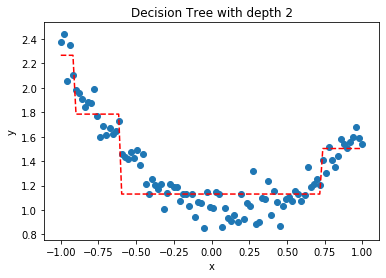

In [11]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)
y_hat=tree_reg.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 2')
plt.show()

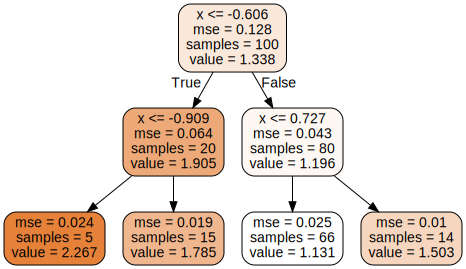

In [16]:
dot_data=export_graphviz(tree_reg, 
                out_file=None,
                feature_names='x',
                rounded=True,
                leaves_parallel=False,
                filled=True)
graph = graphviz.Source(dot_data)
graph

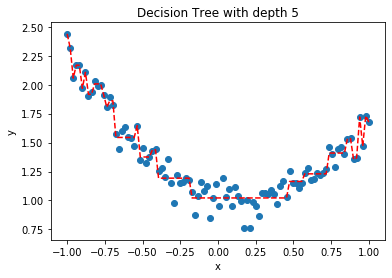

In [89]:
tree_reg=DecisionTreeRegressor(max_depth=5)
tree_reg.fit(x,y)
y_hat=tree_reg.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 5')
plt.show()

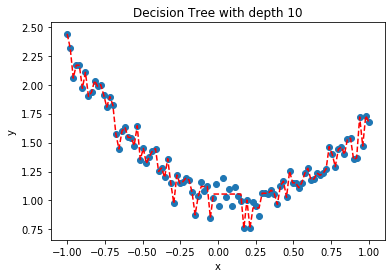

In [90]:
tree_reg=DecisionTreeRegressor(max_depth=10)
tree_reg.fit(x,y)
y_hat=tree_reg.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 10')
plt.show()

## Ensemble Learning

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

### 1. Voting Classifier/Regressor

Ensemble methods work best when the classifiers are independent from each another. One way to do is to train the data using very different algorithms.

hard voting: majority-vote

soft voting: average predicted probability


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


logic=LogisticRegression(penalty='none', multi_class='multinomial')
svm=SVC(kernel='linear', C=1)
tree=DecisionTreeClassifier(max_depth=3)

voting=VotingClassifier(estimators=[('Logistic', logic),
                                    ('SVM', svm),
                                    ('DecisionTree', tree)], voting='hard')

for classifier in (logic, svm, tree, voting):
    cv_score=cross_val_score(classifier, X, Y, cv=10, scoring='accuracy')
    print(classifier.__class__.__name__, cv_score.mean())


LogisticRegression 0.9800000000000001
SVC 0.9733333333333334
DecisionTreeClassifier 0.96
VotingClassifier 0.9800000000000001


### 2. Bagging

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression.

Bagging introduces a bit more diversity in the subsets that each classifier is trained on, so it ends up with a slightly higher bias but it also reduces variance and helps to avoid overfitting.

Each estimator has higher bias, but the varaiance of the average becomes var/n if assume each estimator is uncorrelated.

__Out-Of-Bag (OOB)__:

As we know, Bootstrap sample n instances with replacement, so only 63% of instances are sampled on average. The remaining 37% of instances that are not samples are called Out-Of-Bag instances. Without Cross-Validation or training-validation splitting, we can just use OOB for model evaluation.

In [157]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(DecisionTreeClassifier(max_depth=2),
                      n_estimators=200, 
                      oob_score=True)

bag_cv_score=cross_val_score(bag, X, Y, cv=50, scoring='accuracy')
print(bag_cv_score.mean(), bag_cv_score.std())

0.9466666666666665 0.13920408678547402


In [155]:
# apply OOB, we can find that OOB score is very close to CV
bag2=BaggingClassifier(DecisionTreeClassifier(max_depth=2),
                      n_estimators=200, 
                      bootstrap=True,
                      oob_score=True)
bag2.fit(X,Y)
bag2.oob_score_

0.9466666666666667

In [140]:
# classification by using a single tree
tree=DecisionTreeClassifier(max_depth=2)
tree_cv_score=cross_val_score(tree, X, Y, cv=50, scoring='accuracy')
print(tree_cv_score.mean(), tree_cv_score.std())

0.94 0.128062484748657


### 3. Random Forests

Not onlt sampling instances like bagging, we can also randomly sample features. That means it is not necessary to use all the predictor for each classifier. Random Forests use this schedule with an ensemble of Decision Trees. Compared with Bagging, it introduces extra randomness and results in a greater tree diversity which once agian trades a higher bias for a lower variance. Besides, Random Forests train each decision train very deep, so the bias is kept extremely low.

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,
                          criterion='gini',
                          max_depth=None,
                          max_features="sqrt",
                          oob_score=True )
RF_cv_score=cross_val_score(RF, X, Y, cv=50, scoring='accuracy')
print(RF_cv_score.mean(),RF_cv_score.std())

0.96 0.10832051206181283


In [23]:
# OOB score is very close to CV
RF=RandomForestClassifier(n_estimators=100,
                          criterion='gini',
                          max_depth=None,
                          max_features="sqrt",
                          oob_score=True )
RF.fit(X,Y)
RF.oob_score_

0.96

__Feature importance__

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [24]:
for name, importance in zip(iris['feature_names'],RF.feature_importances_):
    print(name, importance)

sepal length (cm) 0.09538739451081693
sepal width (cm) 0.025431921772663114
petal length (cm) 0.453490204982113
petal width (cm) 0.4256904787344069


__permutation importance__

First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. Next, a feature column from the validation set is permuted and the metric is evaluated again. The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
X = [[1, 9, 9],
     [1, 9, 9],
     [1, 9, 9],
     [0, 9, 9],
     [0, 9, 9],
     [0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]
clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

print(result.importances_mean)

print(result.importances_std)

[0.46666667 0.         0.        ]
[0.22110832 0.         0.        ]


### 4. Boosting

Boosting trains several weak learner sequentially, each trying to correct its predecessor by paying more attention to the misclassified samples or errors. 

### 4.1 Adaboosting:

$$F_m(x)= \alpha_1 f_1(x) + \alpha_2 f_2(x) +   ... + \alpha_m f_m(x)$$


Loss Function: 
$$L=\sum_{i=1}^n e^{-y_i F_m(x_i)}$$

So at each iteration stage, saying we have already learned $F_{m-1}$, it needs to optimize the coefficient $\alpha_m$ and learner $f_m$ such that the loss is minimized.
$$L=\sum_{i=1}^n e^{-y_i F_{m-1}(x_i) - y_i\alpha_m f_m(x_i)}$$

Denote weight $w_m(x_i)= e^{-y_i F_{m-1}(x_i)}$, we have 
$$L=\sum_{i=1}^n w_m(x_i)e^{-y_i\alpha_m f_m(x_i)}$$

Through some algebra, we can get that train a new learner $f_m$ minimizing the loss is equivalent to minimize the weighted errors $e_m=\sum_{f_m(x_i) \neq y_i} w_m(x_i)$, and the optimal $\alpha_m=\frac{1}{2}log(\frac{1-e_m}{e_m})$

Algorithm:

1. Initialize $w_1(x_i)=1/n$, $F_0=0$

For m from 1 to T:

2. Train a new learner $f_m$ that can minimize $e_m=\sum_{f_m(x_i) \neq y_i} w_m(x_i)$, or
$f_m = argmin_{f_m} e_m$


3. Choose $\alpha_m=\frac{1}{2}log(\frac{1-e_m}{e_m})$


4. Add to ensemble $F_{m}=F_{m-1}+\alpha_m f_m$


5. Update wights $w_{m+1}(x_i)=w_m(x_i) e^{-y_i \alpha_m f_m(x_i)}$ for $i=1,...,n$
   
   Nomalize $w_{m+1}(x_i)$ such that $\sum_i w_{m+1}(x_i)=1$
   
End For

In [29]:
from sklearn.ensemble import AdaBoostClassifier
# base learner is a one-depth decision tree
# train 10 sequential trees
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=10)
ada_cv_score=cross_val_score(ada, X, Y, cv=50, scoring='accuracy')
print(ada_cv_score.mean(),ada_cv_score.std())

0.9466666666666665 0.12220201853215575


In [34]:
# train 30 sequential trees (it converges)
ada2=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30)
ada2_cv_score=cross_val_score(ada2, X, Y, cv=50, scoring='accuracy')
print(ada2_cv_score.mean(),ada2_cv_score.std())

0.9533333333333335 0.11566234381931648


2-D Decision Boundary

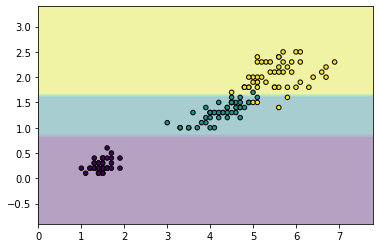

In [37]:
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=10)
ada.fit(petal_len_wid,Y)
decision_region(petal_len_wid, Y, ada)

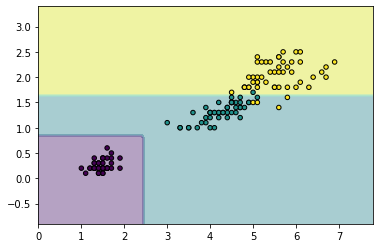

In [38]:
ada2=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30)
ada2.fit(petal_len_wid,Y)
decision_region(petal_len_wid, Y, ada2)

### 4.2 Gradient Boosting

Consider a greedy optimization problem,

$$F_m(x)=F_{m-1}(x) + argmin_{f_m} \sum_{i=1}^n L(y_i, F_{m-1}(x_i)+f_m(x_i))$$

Unfortunately, choosing the best function f at each step for an arbitrary loss function L is a computationally infeasible optimization problem in general. Therefore, we restrict our approach to a simplified version of the problem. The idea is to apply a steepest descent step to this minimization problem (functional gradient descent).

$$F_m(x)=F_{m-1}(x) - \gamma_m \sum_{i=1}^n \frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}$$

where the derivatives are taken with respect to the functions $F_{m-1}$, and $\gamma_{m}$ is the step length. We choose the candidate function $f$ closest to the gradient of $L$ for which the coefficient $\gamma_{m}$ may then be calculated with the aid of line search. Note that this approach is a heuristic and therefore doesn't yield an exact solution to the given problem, but rather an approximation.

Consider MSE loss $L(y, F(x))=\frac{1}{2}(y-F(x))^2$, we have

$$-\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}= y_i-F_{m-1}(x_i)$$
which is the remained residuals.


__Algorithm__:

1. Initialize model with a constant value $F_0= argmin_{c}\sum_{i=1}^n L(y_i,c)$

For m from 1 to T:

2. Calculate residual $r_m(x_i)=y_i-F_{m-1}(x_i)$


3. Fit a weak learner $f_m(x)$ to pseudo-residuals, i.e. train it using the training set $\{x_i, r_m(x_i)\}_{i=1}^n$


4. Compute step $\gamma_m= argmin_{\gamma} \sum_{i=1}^n L(y_i, F_{m-1}(x) + \gamma f_m(x_i))$


5. Update model $F_m(x)=F_{m-1}(x) + \gamma_m f_m(x) $

End For.



#### Regularization tricks:

__a. Early stopping__: Add one more tree iteratively until the loss or error rate will not increase, then stop.


__b. Shrinkage__: Use learning rate as a regularization parameter to scale the contribution of each tree. If you set it to a low value, you will need more tree in the ensemble, but predictions will usually generalize better.

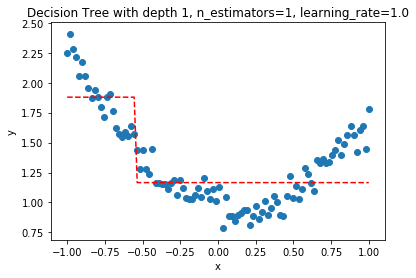

In [198]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(max_depth=1, n_estimators=1, learning_rate=1.0)
gbr.fit(x,y.ravel())
y_hat=gbr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 1, n_estimators=1, learning_rate=1.0')
plt.show()

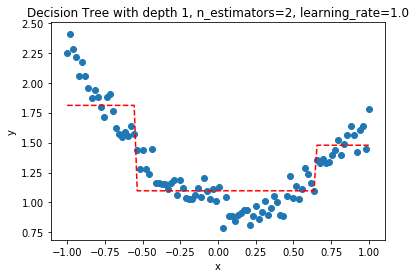

In [199]:
gbr=GradientBoostingRegressor(max_depth=1, n_estimators=2, learning_rate=1.0)
gbr.fit(x,y.ravel())
y_hat=gbr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 1, n_estimators=2, learning_rate=1.0')
plt.show()

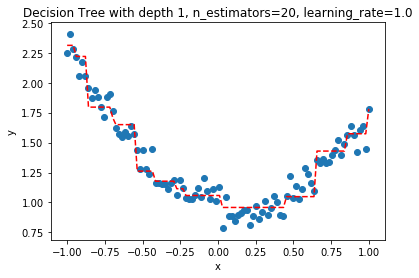

In [207]:
gbr=GradientBoostingRegressor(max_depth=1, n_estimators=20, learning_rate=1.0)
gbr.fit(x,y.ravel())
y_hat=gbr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 1, n_estimators=20, learning_rate=1.0')
plt.show()

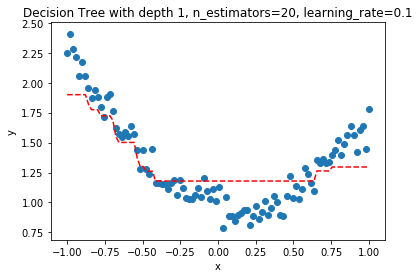

In [208]:
gbr=GradientBoostingRegressor(max_depth=1, n_estimators=20, learning_rate=0.1)
gbr.fit(x,y.ravel())
y_hat=gbr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with depth 1, n_estimators=20, learning_rate=0.1')
plt.show()

### 4.3 XGBoost

XGBoost is similar to gradient boosting algorithm but it has a few tricks up its sleeve which makes it stand out from the rest.

Features of XGBoost are:

* Clever Penalization of Trees
* A Proportional shrinking of leaf nodes
* Newton Boosting
* Extra Randomisation Parameter

In XGBoost the trees can have a varying number of terminal nodes and left weights of the trees that are calculated with less evidence is shrunk more heavily. Newton Boosting uses Newton-Raphson method of approximations which provides a direct route to the minima than gradient descent. The extra randomisation parameter can be used to reduce the correlation between the trees, the lesser the correlation among classifiers, the better our ensemble of classifiers will turn out. Generally, XGBoost is faster than gradient boosting but gradient boosting has a wide range of application.

XGBoost PYPI:
https://pypi.org/project/xgboost/

install XGBoost:

    pip install xgboost

You can google it if it fails for some reason.

What I tried: download this tarball

    xgboost-0.7.post5.tar.gz  
and run

    pip3 install xgboost-0.7.post5.tar.gz

    pip install xgboost

In [13]:
# XGBoost 
from xgboost import XGBClassifier

# max_depth=1, n_estimators=30
xgb = XGBClassifier(max_depth=1, learning_rate=1, n_estimators=30)
xgb_cv_score=cross_val_score(xgb, X, Y, cv=50, scoring='accuracy')
print(xgb_cv_score.mean(),xgb_cv_score.std())

0.94 0.128062484748657


In [20]:
# max_depth=3, n_estimators=100
xgb = XGBClassifier(max_depth=3, learning_rate=1, n_estimators=100)
xgb_cv_score=cross_val_score(xgb, X, Y, cv=50, scoring='accuracy')
print(xgb_cv_score.mean(),xgb_cv_score.std())

0.9533333333333333 0.1156623438193165
